In [1]:
import mlrun

In [2]:
# Define the link to the project source in git
git_source = 'git://github.com/GiladShapira94/test_push_1.git#test'

In [3]:
#Load the project from the Git URL, specified by a new name (ci-cd-load) and put it in the project_context directory
project = mlrun.load_project(context='./project_context',url = git_source,clone=True)
# Alternaticely pull the latest code from git with project.pull("my_git_project")  

In [4]:
print(project.to_yaml())

kind: project
metadata:
  name: new-git-project
spec:
  functions:
  - url: fetch_data.py
    name: fetch_data
    kind: job
    image: mlrun/mlrun
    handler: fetch_data
  - url: trainer.py
    name: trainer
    kind: job
    image: mlrun/mlrun
    handler: train
  - url: serving.yaml
    name: serving
    kind: serving
  workflows:
  - path: ./workflow.py
    name: main
  artifacts:
  - kind: dataset
    metadata:
      project: new-git-project
      key: data
    spec:
      target_path: https://s3.wasabisys.com/iguazio/data/iris/iris.data.raw.csv
      format: ''
    status:
      state: created
  - kind: model
    metadata:
      project: new-git-project
      key: model
    spec:
      target_path: s3://mlrun/projects/new-git-proj/artifacts/trainer-train/0/model/
      model_file: iris_model.pkl
    status:
      state: created
  conda: ''
  source: git://github.com/GiladShapira94/test_push_1.git#refs/heads/test
  origin_url: git://github.com/GiladShapira94/test_push_1.git#refs/

In [5]:
data_art = project.get_artifact('data')

In [6]:
print(data_art.to_yaml())

kind: dataset
metadata:
  key: data
  project: new-git-project
  iter: 0
  tree: 04c386b8ed664a14fe354b3588483652d2ecc517
  tag: latest
  updated: '2023-03-13T10:55:41.716491+00:00'
spec:
  target_path: https://s3.wasabisys.com/iguazio/data/iris/iris.data.raw.csv
  format: ''
  db_key: data
  producer:
    kind: project
    name: new-git-project
    tag: 04c386b8ed664a14fe354b3588483652d2ecc517
  sources: []
  license: ''
status:
  state: created



In [7]:
# project.set_source(source=git_source,pull_at_runtime=True)

In [8]:
# Check that the project loaded properly
# print(project.to_yaml())

In [9]:
# Before running the main workflow we need to prepare the dataset and model arguments
dataset = project.get_artifact('data')
model = project.get_artifact('model')

In [10]:
# df = dataset.to_dataitem().as_df()

In [11]:
# fetch_data_run = project.run_function('fetch_data',inputs={'dataset': dataset.uri})

In [12]:
data_url = 'https://s3.wasabisys.com/iguazio/data/iris/iris.data.raw.csv'

In [13]:
'''
trainer_run = project.run_function("trainer",
        inputs={"dataset": data_url},
        params = {
            "model_class": "sklearn.ensemble.RandomForestClassifier",
            "train_test_split_size": 0.2,
            "label_columns": "label",
            "model_name":'iris_model'}, handler='train')
'''

'\ntrainer_run = project.run_function("trainer",\n        inputs={"dataset": data_url},\n        params = {\n            "model_class": "sklearn.ensemble.RandomForestClassifier",\n            "train_test_split_size": 0.2,\n            "label_columns": "label",\n            "model_name":\'iris_model\'}, handler=\'train\')\n'

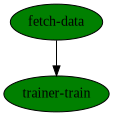

uid,start,state,name,parameters,results
...01e05cef,Mar 13 10:56:27,completed,trainer-train,model_class=sklearn.ensemble.RandomForestClassifiertrain_test_split_size=0.2label_columns=labelmodel_name=iris_model,accuracy=1.0f1_score=1.0precision_score=1.0recall_score=1.0auc-micro=1.0auc-macro=1.0auc-weighted=1.0
...f5984804,Mar 13 10:56:03,completed,fetch-data,,label_column=label


bdfb3085-ea04-40cd-a36e-f63ec4e048e1

In [14]:
project.run("main", arguments={'dataset_uri': dataset.uri, 'model_name': "iris_model"},watch=True)  # run the workflow "main"